In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4


In [ ]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"


In [5]:
data = pd.read_pickle('AgesAndHeights.pkl')
data


,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


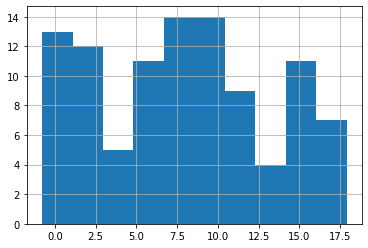

In [8]:
ages.hist()

In [9]:
ages[ages < 0]

13   -0.163532
20   -0.683017
25   -0.146392
30   -0.780853
36   -0.087958
59   -0.548488
91   -0.328780
Name: Age, dtype: float64

In [6]:
ages = data['Age']
heights = data['Height']

fig = px.scatter(x=ages, y=heights, title="Height vs Age", labels={'x': 'Age (Years)',
                                                                   'y': 'Height (Inches)'})
fig.show()

In [13]:
data = data[ages > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55c790a390>,
      dtype=object)

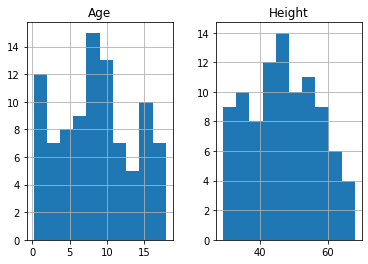

In [11]:
data.hist()

In [15]:
fig = px.scatter(x=data.Age, y=data.Height, title="Height vs Age", labels={'x': 'Age (Years)',
                                                                   'y': 'Height (Inches)'})
fig.show()

In [16]:
ages = data['Age']
heights = data['Height']

x = ages.to_numpy()
y = heights.to_numpy()


In [21]:
model = LinearRegression().fit(x.reshape((len(x), 1)), y)
model.coef_

array([2.0014169])

In [35]:
np.arange(18) == x_new.reshape(x_new.shape[0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [34]:
x_new.reshape(x_new.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [43]:
model.predict(np.arange(18).reshape((18, 1)))

array([29.96185761, 31.96327451, 33.96469141, 35.96610831, 37.96752521,
       39.96894211, 41.97035901, 43.97177591, 45.97319281, 47.9746097 ,
       49.9760266 , 51.9774435 , 53.9788604 , 55.9802773 , 57.9816942 ,
       59.9831111 , 61.984528  , 63.9859449 ])

In [85]:
fig = px.scatter(x=ages, y=heights, title="Height vs Age", labels={'x': 'Age (Years)',
                                                                   'y': 'Height (Inches)'})
fig.add_trace(
    go.Scatter(x=np.arange(19), y=model.predict(np.arange(19).reshape((19, 1))), mode='lines', name='Model'))

fig.write_image('OG.svg', width=800)
fig.show()

In [47]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

In [49]:
data = data[ages > 0]

In [ ]:
data

In [56]:
loaded_model = load('model.joblib')

In [58]:
# After Step 3



def make_picture(training_data_filename, new_input_arr, model, output_file='predictions_pic.svg'):

  # Plot training data with model
  data = pd.read_pickle('AgesAndHeights.pkl')
  data = data[data.Age > 0]
  #draw points
  ages = data['Age']
  heights = data['Height']
  fig = px.scatter(x=ages, y=heights, title="Height vs Age", labels={'x': 'Age (Years)',
                                                                   'y': 'Height (Inches)'})
  #draw a line
  x_new = np.arange(18).reshape((18, 1))
  preds  = model.predict(x_new)

  fig.add_trace(
      go.Scatter(x=x_new.reshape(x_new.shape[0]), y=preds, mode='lines', name='Model'))

  if new_input_arr is not False:
    # Plot new predictions
    fig.add_trace(
      go.Scatter(x=new_input_arr.reshape(new_input_arr.shape[0])
      , y=model.predict(new_input_arr)
      , name='New Outputs', mode='markers', marker=dict(
            color='purple',
            size=20,
            line=dict(
                color='purple',
                width=2
            ))))
  
  fig.write_image(output_file, width=800)
  return fig

In [59]:
make_picture('AgesAndHeights.pkl', np.array([[1],[17]]), loaded_model)

In [79]:
def is_float(x):
  try:
    float(x)
    return True
  except:
    return False
def floats_string_to_input_arr(floats_str):
  try:
    floats = [float(x.strip()) for x in floats_str.split(',') if is_float(x)]
    as_np_arr = np.array(floats).reshape(len(floats), 1)
    return as_np_arr
  except:
    print("you need to enter ")

In [82]:
floats_string_to_input_arr('1, 2, 3')

array([[1.],
       [2.],
       [3.]])

In [83]:
make_picture('AgesAndHeights.pkl', floats_string_to_input_arr('1, 2.5, 2.8'), loaded_model)

In [88]:

text = "1,2,3"

text = floats_string_to_input_arr(text)
path = 'static/predictions_pic.svg'
model = load(filename='model.joblib')

def make_picture(training_data_filename, model, new_inp_np_arr, output_file):
    
    # Plot training data with model
    data = pd.read_pickle(training_data_filename)
    ages = data['Age']
    data = data[ages > 0]
    ages = data['Age']
    heights = data['Height']
    #draw a line
    x_new = np.array(list(range(19))).reshape(19, 1)
    preds = model.predict(x_new)
    fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                                    'y': 'Height (inches)'})
    fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))
    # new_preds = model.predict(new_inp_np_arr)
    # fig.add_trace(go.Scatter(x=new_inp_np_arr.reshape(len(new_inp_np_arr))
    #                                 , y=new_preds, name='New Outputs', mode='markers'
    #                                 , marker=dict(color='purple', size=20, line=dict(color='purple', width=2))))

    if new_input_arr is not False:
        # Plot new predictions
        fig.add_trace(
        go.Scatter(x=new_input_arr.reshape(new_input_arr.shape[0])
        , y=model.predict(new_input_arr)
        , name='New Outputs', mode='markers', marker=dict(
                color='purple',
                size=20,
                line=dict(
                    color='purple',
                    width=2
                ))))
    
    fig.write_image(output_file, width=800,engine = 'kaleido')
    return fig




def floats_string_to_input_arr(floats_str):
    
    def is_float(x):
        try:
            float(x)
            return True
        except:
            return False
    floats = [float(x.strip()) for x in floats_str.split(',') if is_float(x)]
    as_np_arr = np.array(floats).reshape(len(floats), 1)
    return as_np_arr
    
path = 'static/predictions_pic.svg'
make_picture('AgesAndHeights.pkl', text, model, output_file=path)

AttributeError: ignored